In [5]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [7]:
# load dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [9]:
# check for NaN values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
MWG          200000 non-null int64
NWG          200000 non-null int64
KWG          200000 non-null int64
MDIMC        200000 non-null int64
NDIMC        200000 non-null int64
MDIMA        200000 non-null int64
NDIMB        200000 non-null int64
KWI          200000 non-null int64
VWM          200000 non-null int64
VWN          200000 non-null int64
STRM         200000 non-null int64
STRN         200000 non-null int64
SA           200000 non-null int64
SB           200000 non-null int64
Run1 (ms)    200000 non-null float64
Run2 (ms)    200000 non-null float64
Run3 (ms)    200000 non-null float64
Run4 (ms)    200000 non-null float64
dtypes: float64(4), int64(14)
memory usage: 27.5 MB


In [12]:
# create a list of column names
col_list = df_train.columns

In [13]:
# print list
col_list

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [16]:
# create test and train dataframes
X = df_train[col_list[0:14]]
Y = df_train[col_list[14:18]]

In [22]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0


In [23]:
Y.head()

,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,287.87,288.66,289.45,288.24
1,241.13,247.84,248.27,247.49
2,148.12,149.99,149.90,150.14
3,301.40,302.43,302.70,301.94
4,244.74,251.80,252.15,251.04


In [28]:
# check correlation between features
corr = X.corr()
corr

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
MWG,1.000000,0.001051,0.009029,0.105391,-0.008573,0.158692,0.015913,0.000872,0.353168,-0.001284,0.001054,0.000206,-0.001419,-0.000209
NWG,0.001051,1.000000,0.009568,-0.006963,0.105328,0.014930,0.158350,0.000145,-0.001766,0.354439,0.001662,-0.000050,0.001333,0.000345
KWG,0.009029,0.009568,1.000000,0.147256,0.149286,-0.034504,-0.034516,-0.000664,-0.012001,-0.011291,0.001232,0.000378,0.001429,0.001780
MDIMC,0.105391,-0.006963,0.147256,1.000000,-0.209356,0.196806,0.084195,-0.001425,-0.136008,0.010672,0.000681,0.001640,0.000600,0.002301
NDIMC,-0.008573,0.105328,0.149286,-0.209356,1.000000,0.083896,0.196434,-0.002619,0.012576,-0.133261,-0.000696,-0.000477,0.000015,-0.002284
MDIMA,0.158692,0.014930,-0.034504,0.196806,0.083896,1.000000,0.087593,0.000678,-0.203317,-0.019162,-0.001546,0.001096,0.000936,0.000320
NDIMB,0.015913,0.158350,-0.034516,0.084195,0.196434,0.087593,1.000000,-0.001316,-0.017708,-0.202883,0.001330,0.000159,-0.000687,-0.001990
KWI,0.000872,0.000145,-0.000664,-0.001425,-0.002619,0.000678,-0.001316,1.000000,-0.000111,0.001201,0.000150,-0.000960,-0.000850,-0.001140
VWM,0.353168,-0.001766,-0.012001,-0.136008,0.012576,-0.203317,-0.017708,-0.000111,1.000000,-0.000071,0.001724,-0.001590,-0.001095,-0.002057
VWN,-0.001284,0.354439,-0.011291,0.010672,-0.133261,-0.019162,-0.202883,0.001201,-0.000071,1.000000,0.000178,0.000425,-0.000569,0.001277


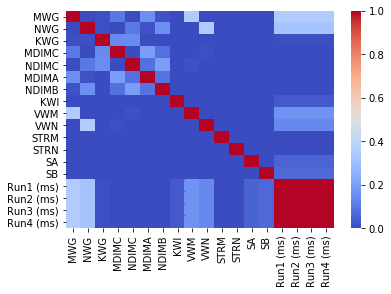

In [29]:
# visualize the correlation between features
sns.heatmap(df_train.corr(),vmax=1,vmin=0, cmap='coolwarm')

In [30]:
adabr_train = AdaBoostRegressor(DecisionTreeRegressor())

In [31]:
# split the given dataset into train and test datasets
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.25,random_state=42)

In [33]:
# predictions for first run
adabr_train.fit(X_train,Y_train['Run1 (ms)'])
pre1 = adabr_train.predict(X_test)

In [34]:
# predictions for second run
adabr_train.fit(X_train,Y_train['Run2 (ms)'])
pre2 = adabr_train.predict(X_test)

In [35]:
# predictions for third run
adabr_train.fit(X_train,Y_train['Run3 (ms)'])
pre3 = adabr_train.predict(X_test)

In [36]:
# predictions for fourth run
adabr_train.fit(X_train,Y_train['Run4 (ms)'])
pre4= adabr_train.predict(X_test)

In [37]:
# RMSE score for final predictions
ans = metrics.mean_squared_error(Y_test['Run1 (ms)'],pre1)+metrics.mean_squared_error(Y_test['Run2 (ms)'],pre2)+metrics.mean_squared_error(Y_test['Run3 (ms)'],pre3)+metrics.mean_squared_error(Y_test['Run4 (ms)'],pre4)
math.sqrt(ans/4)

5.050348132505321

In [38]:
X_test_final = df_test.copy()

In [43]:
X_test_final.drop(labels=['Id'], axis=1, inplace=True)

In [44]:
X_test_final.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,64,64,32,8,8,8,8,8,8,8,1,0,0,1
1,64,64,32,8,8,8,8,8,8,4,1,1,0,0
2,64,64,32,8,8,8,8,8,8,2,1,1,0,1
3,64,64,32,8,8,8,8,8,8,2,1,0,1,0
4,64,64,32,8,8,8,8,8,8,2,1,0,0,1


In [48]:
adabr_final = AdaBoostRegressor(DecisionTreeRegressor())

In [49]:
# final predictions for Run 1
adabr_final.fit(X,Y['Run1 (ms)'])
pre1_final = adabr_final.predict(X_test_final)

In [50]:
# final predictions for Run 2Fdff
adabr_final.fit(X,Y['Run2 (ms)'])
pre2_final = adabr_final.predict(X_test_final)

In [51]:
# final predictions for Run 3
adabr_final.fit(X,Y['Run3 (ms)'])
pre3_final = adabr_final.predict(X_test_final)

In [52]:
# final predictions for Run 4
adabr_final.fit(X,Y['Run4 (ms)'])
pre4_final = adabr_final.predict(X_test_final)

In [53]:
# create final dataframe
df_ans = pd.DataFrame(df_test['Id'],columns=['Id'])
df_ans[col_list[14]]=pre1_final
df_ans[col_list[15]]=pre2_final
df_ans[col_list[16]]=pre3_final
df_ans[col_list[17]]=pre4_final
df_ans.head()

,Id,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,Id_1,151.38,151.23,151.12,151.29
1,Id_2,271.90,271.64,272.11,271.87
2,Id_3,194.72,192.16,192.87,194.67
3,Id_4,196.46,196.02,196.15,196.50
4,Id_5,165.03,165.45,164.93,164.65


In [54]:
# create final csv file
df_ans.to_csv('Answer.csv',index=False)